In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../datasets/SMS-SPAM.csv", encoding="latin-1")

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df = df[["v1", "v2"]].rename(columns={"v1": "spam", "v2": "message"})

In [5]:
df['spam'] = df['spam'].map({'ham': 0, 'spam': 1})

In [6]:
df['spam'].value_counts()

spam
0    4825
1     747
Name: count, dtype: int64

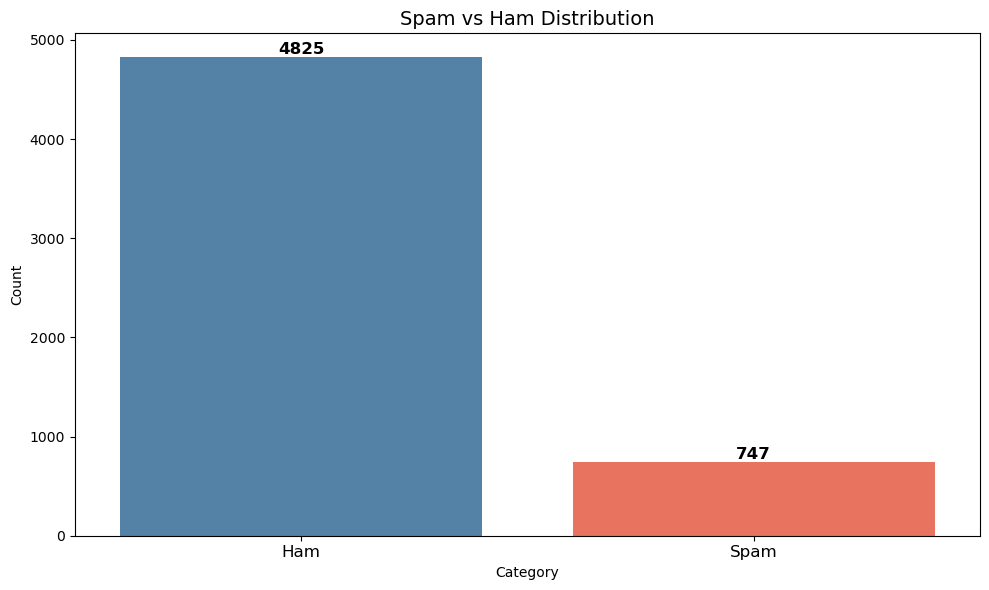

In [34]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x='spam', data=df, hue='spam', legend=False,
                   palette={0: 'steelblue', 1: 'tomato'})
# Add count labels on bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.xticks([0, 1], ['Ham', 'Spam'], fontsize=12)
plt.title('Spam vs Ham Distribution', fontsize=14)
plt.xlabel('Category')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


In [24]:
df.head()

,spam,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
X = df['message']
y=df['spam']

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

X_train,X_test, y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=72, stratify=y)
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test  = vectorizer.transform(X_test) 

In [86]:
from sklearn import svm

clf = svm.SVC(C=0.6, kernel='rbf', gamma='scale', degree=3, class_weight=None)
clf.fit(X_train,y_train)

SVC(C=0.6)

In [87]:
def predict_messages(model, vectorizer, df, n=10):
    """
    Predict spam/ham for messages up to index n
    
    Parameters:
        model      : trained classifier
        vectorizer : fitted vectorizer
        df         : original dataframe
        n          : number of messages to show (default=10)
    """
    subset = df.iloc[:n].copy()
    
    X = vectorizer.transform(subset['message'])
    predictions = model.predict(X)
    
    subset['predicted'] = predictions
    subset['predicted_label'] = subset['predicted'].map({0: 'Ham', 1: 'Spam'})
    subset['actual_label']    = subset['spam'].map({0: 'Ham', 1: 'Spam'})
    subset['correct']         = subset['predicted'] == subset['spam']
    
    print(f"{'Index':<6} {'Actual':<12} {'Predicted':<12} {'Correct':<8} {'Message'}")
    print("-" * 80)
    for idx, row in subset.iterrows():
        msg = row['message'][:45] + '...' if len(row['message']) > 45 else row['message']
        print(f"{idx:<6} {row['actual_label']:<12} {row['predicted_label']:<12} {str(row['correct']):<8} {msg}")
    
    print("-" * 80)
    correct = subset['correct'].sum()
    print(f"\nAccuracy on first {n} messages: {correct}/{n} = {correct/n*100:.1f}%")
    
    return subset

In [88]:
predict_messages(clf, vectorizer, df[500:900])

Index  Actual       Predicted    Correct  Message
--------------------------------------------------------------------------------
500    Ham          Ham          True     Fighting with the world is easy, u either win...
501    Ham          Ham          True     When can Ì_ come out?
502    Ham          Ham          True     Check with nuerologist.
503    Ham          Ham          True     Lolnice. I went from a fish to ..water.?
504    Spam         Spam         True     +123 Congratulations - in this week's competi...
505    Ham          Ham          True     No it's waiting in e car dat's bored wat. Cos...
506    Ham          Ham          True     Maybe westshore or hyde park village, the pla...
507    Ham          Ham          True     You should know now. So how's anthony. Are yo...
508    Ham          Ham          True     What's the significance?
509    Ham          Ham          True     Your opinion about me? 1. Over 2. Jada 3. Kus...
-------------------------------------------

,spam,message,predicted,predicted_label,actual_label,correct
500,0,"Fighting with the world is easy, u either win ...",0,Ham,Ham,True
501,0,When can Ì_ come out?,0,Ham,Ham,True
502,0,Check with nuerologist.,0,Ham,Ham,True
503,0,Lolnice. I went from a fish to ..water.?,0,Ham,Ham,True
504,1,+123 Congratulations - in this week's competit...,1,Spam,Spam,True
505,0,No it's waiting in e car dat's bored wat. Cos ...,0,Ham,Ham,True
506,0,"Maybe westshore or hyde park village, the plac...",0,Ham,Ham,True
507,0,You should know now. So how's anthony. Are you...,0,Ham,Ham,True
508,0,What's the significance?,0,Ham,Ham,True
509,0,Your opinion about me? 1. Over 2. Jada 3. Kusr...,0,Ham,Ham,True


In [89]:
y_pred = clf.predict(X_test)

In [90]:
from sklearn.metrics import classification_report
print("\n", classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))


               precision    recall  f1-score   support

         Ham       0.98      1.00      0.99       966
        Spam       1.00      0.86      0.92       149

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115



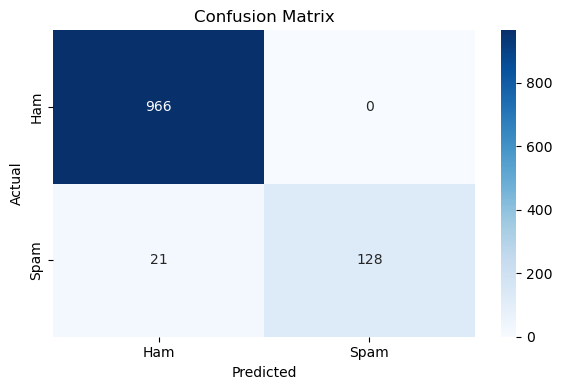

In [91]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Ham', 'Spam'],
            yticklabels=['Ham', 'Spam'])

plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()